In [1]:
import pandas as pd

import wget
import zipfile
import os

import plotly.io as pio
pio.templates.default = "plotly_white" # Set plotly theme

if not os.path.isfile("rawinventor.tsv"):
    wget.download("https://s3.amazonaws.com/data.patentsview.org/download/rawinventor.tsv.zip")
    with zipfile.ZipFile("rawinventor.tsv.zip", 'r') as zip_ref:
        zip_ref.extractall(".")
    os.remove("rawinventor.tsv.zip")

if not os.path.isfile("disambiguation.tsv"):
    rawinventor = pd.read_csv("rawinventor.tsv", sep="\t")
    rawinventor["mention-id"] = "US" + rawinventor.patent_id.astype(str) + "-" + rawinventor.sequence.astype(str)
    rawinventor[["mention-id", "inventor_id"]].to_csv("disambiguation.tsv", sep="\t", index=False)
    del(rawinventor)

In [2]:
from pv_evaluation.benchmark import (
    inventor_benchmark_table,
    inventor_benchmark_plot,
)

data = pd.read_csv("disambiguation.tsv", sep="\t")
data.set_index("mention-id", inplace=True)
result = data["inventor_id"]

disambiguations = {
    "current": result,
    "one cluster": 0*result
}

In [3]:
inventor_benchmark_table(disambiguations)

,benchmark,metric,algorithm,value
0,patentsview-inventors,cluster precision,current,0.836364
1,patentsview-inventors,cluster precision,one cluster,0.000000
2,patentsview-inventors,cluster recall,current,0.985075
3,patentsview-inventors,cluster recall,one cluster,1.000000
4,patentsview-inventors,cluster f1,current,0.904648
5,patentsview-inventors,cluster f1,one cluster,0.000000
6,israeli-inventors,cluster precision,current,0.986606
7,israeli-inventors,cluster precision,one cluster,0.000000
8,israeli-inventors,cluster recall,current,0.943729
9,israeli-inventors,cluster recall,one cluster,1.000000


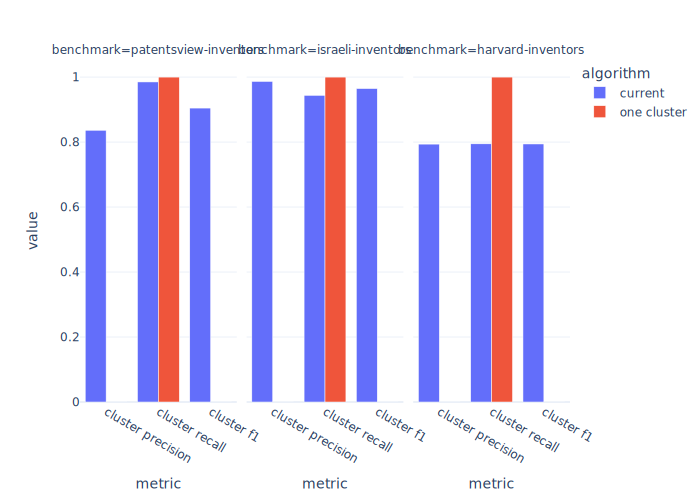

In [4]:
inventor_benchmark_plot(disambiguations).show('svg')

In [5]:
from pv_evaluation.benchmark import inspect_clusters_to_split, inspect_clusters_to_merge, load_harvard_inventors_benchmark

In [6]:
inspect_clusters_to_split(result, load_harvard_inventors_benchmark())

,prediction,reference
mention-id,,
US7491743-3,fl:al_ln:degterev-1,802
US7253201-1,fl:al_ln:degterev-1,498
US7390836-1,fl:al_ln:degterev-1,498
US7144905-1,fl:al_ln:degterev-1,498
US6706766-1,fl:al_ln:degterev-1,498
...,...,...
US7771935-1,fl:ze_ln:gartner-2,442
US7557068-1,fl:ze_ln:gartner-2,343
US7476500-1,fl:ze_ln:gartner-2,219


In [7]:
inspect_clusters_to_merge(result, load_harvard_inventors_benchmark())

,reference,prediction
mention-id,,
US5720935-1,3,fl:ca_ln:foulon-1
US5811073-0,3,fl:am_ln:kassis-1
US7254151-2,4,fl:yu_ln:huang-206
US7772543-2,4,fl:gu_ln:yu-47
US7279172-2,6,fl:ru_ln:arnon-1
...,...,...
US7390836-2,802,fl:ti_ln:mitchison-1
US7838302-3,816,fl:bo_ln:huang-48
US7776613-2,816,fl:mi_ln:rust-2
